# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

Altered by Shannon Dee Algar 2022 for CITS4403, UWA.

### Setup

Import files, define toggle functions etc

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

In [2]:
import matplotlib.pyplot as plt
import networkx as nx   #导入networkX包
import numpy as np
import seaborn as sns

from utils import decorate, savefig

# Set the random seed so the notebook produces the same results every time.
np.random.seed(17)

- [ ] **Exercise:** Why would we set a random seed?

In [3]:
# make a directory for figures
!mkdir -p figs

In [4]:
# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
# sns.palplot(colors) #displays the colours of chosen palette
sns.set_palette(colors)

In [5]:
# to hide solution until toggled...

from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

In [6]:
# And then use it in cells like this:

x = 1
y = 2
print('Result is {} + {}'.format(x, y))

hide_toggle()

Result is 1 + 2


## Directed graph

The first example is a directed graph that represents a social network with three nodes.

For graph types see here: https://networkx.org/documentation/stable/reference/classes/index.html

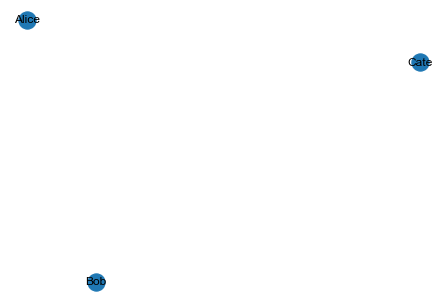

In [7]:
G = nx.DiGraph() 
# nx.DiGraph?
# for the details: G.add_node? or https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.add_node.html?highlight=add_node#networkx.DiGraph.add_node
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Cate')
list(G.nodes())
nx.draw(G, with_labels=True)  #画图指令 

Here's how we add edges between nodes.
这是我们在节点之间添加边的方法。

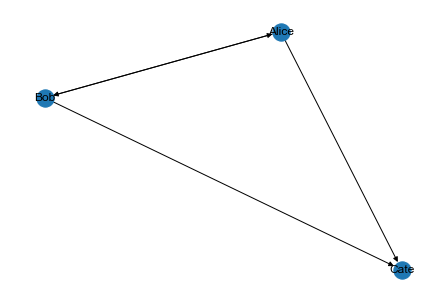

In [8]:
# G.add_edge?
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Cate')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Cate')
list(G.edges())
nx.draw(G, with_labels=True)

And here's how to draw the graph.

Saving figure to file figs/chap02-1


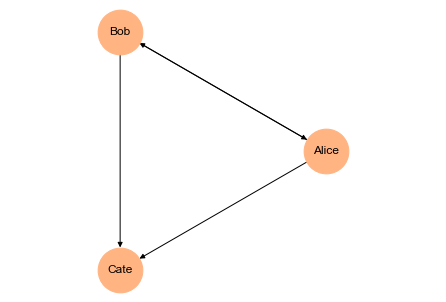

In [9]:
# nx.draw?
# nx.draw_circular?

nx.draw_circular(G,
                 node_color='C1', #颜色C0 is a matplotlib colour option, see here: https://matplotlib.org/2.0.2/users/colors.html
                 node_size=2000, 
                 with_labels=True)
#equivalently...
# pos = nx.circular_layout(G)
# nx.draw(G, pos)

#Or draw in another layout: https://networkx.org/documentation/stable/reference/drawing.html

plt.axis('equal')
savefig('figs/chap02-1')  #保存地址

- [x] **Exercise:**  Add another node and a few more edges and draw the graph again.

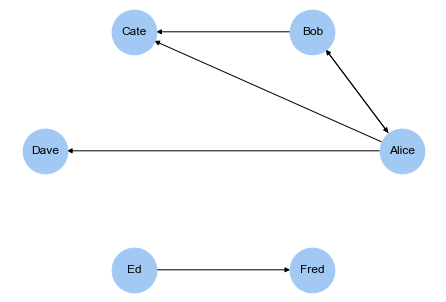

In [10]:
#adding edge automatically adds node if not already present
G.add_edge('Alice', 'Dave')
G.add_edge('Ed', 'Fred') 

nx.draw_circular(G,
                 node_color='C0', #C0 is a matplotlib colour option, see here: https://matplotlib.org/2.0.2/users/colors.html
                 node_size=2000, 
                 with_labels=True)
hide_toggle()
nx.draw?

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`positions` is a dictionary that maps from each city to its coordinates.

In [11]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions['Albany']

(-74, 43)

We can use the keys in `positions` to add nodes to the graph.

In [12]:
G = nx.Graph()
G.add_nodes_from(positions) #G.add_nodes_from?
G.nodes(data=True) #or get attributes with G.nodes(data=True)

NodeDataView({'Albany': {}, 'Boston': {}, 'NYC': {}, 'Philly': {}})

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [13]:
#添加路径时间
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [14]:
G.add_edges_from(drive_times)
#展示G的边缘
G.edges(data=True) #or get attributes with G.edges(data=True)


EdgeDataView([('Albany', 'Boston', {}), ('Albany', 'NYC', {}), ('Boston', 'NYC', {}), ('NYC', 'Philly', {})])

Now we can draw the graph using `positions` to indicate the positions of the nodes, and `drive_times` to label the edges.

Saving figure to file figs/chap02-2


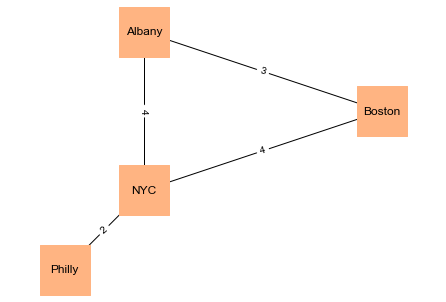

In [15]:
nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)
#with_labels=True表示将节点默认标签写入节点

#将drive_times写入边属性
nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

#输出图片的格式为正方形
plt.axis('equal')
savefig('figs/chap02-2')

#W2.1
# This labels with an edge but the weight is not an edge attribute. Similarly, the layout is set with positions but position is not an attribute...
# G.edges(data=True)
# Consider how to do this in your Workshop this week.

- [x] **Exercise:**  Add another city and at least one edge.

In [16]:
添加权重边添加坐标点

# either add node to existing graph...
# G.add_node('Perth')
# G.add_edge('Perth','NYC')
# # G.edges(data=True)
# nx.draw(G, 
#         node_color='C1', 
#         node_shape='s', 
#         node_size=2500,
#         with_labels=True)

#but this hasn't worked so well with edge labels and node positions not easily set. 


# or add to dict and redefine graph as per previous cell or add new node...
positions['Perth']=(-76, 42)
G.add_node('Perth')
drive_times[('Perth', 'NYC')] = 3 
# or drive_times.update({('Perth', 'Albany'): 1003,
#                     ('Perth', 'NYC'): 1000,
#                     ('Perth', 'Philly'): 1002})
# print(drive_times)
G.add_edges_from(drive_times)

nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

    

NameError: name '添加权重边添加坐标点' is not defined

- [ ] **Exercise:** Re-do this with weights that are assigned as attributes to each edge and lat/lon coordinates assigned as attributes to each node

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

(There is also an inbuilt function for doing this: https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html)

In [ ]:
#抄 
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes, `n`, and edges, `n(n-1)/2`, between all pairs of nodes.

In [ ]:
#抄   如何构建完全图
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

(This is normally labelled $K_{10}$)

In [ ]:
complete = make_complete_graph(10)
#有几个点
complete.number_of_nodes()
#有几条边
complete.number_of_edges()

And here's what it looks like.

In [ ]:
nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-3')

The `neighbors` method give the neighbors for a given node.

In [ ]:
#列出所有0节点的到达点
list(complete.neighbors(0))

- [ ] **Exercise:** this is as expected for a complete graph with node 0 connected to all other nodes.

remove an edge and relist the neighbours (you may need to search the documentation for the appropriate function to remove)

remove a node and relist the neighbours

In [ ]:
#complete.remove_node(0)
print(list(complete.neighbors(2)))
#删除具体的某一条边
complete.remove_edge(2, 3)
list(complete.neighbors(2))
nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
#我们可以发现2到3的边消失了

hide_toggle()

- [x] **Exercise:** Make and draw a complete directed graph with 5 nodes. How many nodes and edges do you expect?

In [ ]:
complete_5 = make_complete_graph(5)
#让作图始终在一个圆内用draw_circular否则draw就是单纯的做出一个5个点的图
nx.draw_circular(complete_5, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
#... that was boring. Oh, a DIRECTED graph...
抄
def all_directed_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i != j:
                yield u, v
                
def make_complete_digraph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_directed_pairs(nodes))
    return G

complete_digraph = make_complete_digraph(5)

nx.draw_circular(complete_digraph, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)



## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [ ]:
def flip(p):
    return np.random.random() < p #np has random_module.random_method
#np.random.random()代表np函数库中的random(),作用是随机输出0-1的任意数

- [ ] **Exercise** How can you check that `flip` is doing what you expect?

In [ ]:

#e.g. check:
# for i in range(30):
#      print(flip(0.1))
# np.random.random()       
        
# hide_toggle()

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [ ]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge


`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [ ]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

#this can also be done with nx.gnp_random_graph
#https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html#networkx.generators.random_graphs.gnp_random_graph

Here's an example with `n=10` and `p=0.3`

In [ ]:
random_graph = make_random_graph(10, 0.5)
len(random_graph.edges())

And here's what it looks like:

In [ ]:
nx.draw_circular(random_graph, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)

savefig('figs/chap02-4')

#If you figure out a 'nice' way to generically fix the nodes being chopped off at the top and bottom let me know!

- [ ] **Exercise** What do you expect the average degree will be? And what is it actually?. Test your answer for different values of n and p.

In [ ]:


hide_toggle()

## Connectivity

检查节点是否连接

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

We can speak about the 'distance' between two nodes being finite or the existence of a path between nodes.

In [ ]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [ ]:
reachable_nodes(random_graph, 0)

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [ ]:
#谁与节点0连接
reachable_nodes(random_graph, 0)

We can use `reachable_nodes` to check whether a graph is connected:

In [ ]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G) #len(G) is the number of nodes in the graph

#there is also a built in function to do this with nx.is_connected(complete)

Again, the complete graph is connected:

In [ ]:
is_connected(random_graph)

But if we generate a random graph with a low value of `p`, it's (probably) not:

In [ ]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())


In [ ]:
is_connected(random_graph)

In [ ]:
#10个点

nx.draw(random_graph)

- [x] **Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [ ]:
"""According to [Wolfram MathWorld](http://mathworld.wolfram.com/ConnectedDigraph.html)

"There are two distinct notions of connectivity in a directed graph. A directed graph is 
weakly connected if there is an undirected path between any pair of vertices, 
and strongly connected if there is a directed path between every pair of vertices"

We'll check for strong connectedness.

"""
#一定要看 1
def directed_reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            #只有有向图才有successors 无向图是neighbourhood
            stack.extend(G.successors(node))
    return seen

def digraph_is_connected(G):
    for start in G:
        reachable = directed_reachable_nodes(G, start)
        if len(reachable) < len(G):
            return False
    return True
        


In [ ]:
complete_digraph = make_complete_digraph(5)
digraph_is_connected(complete_digraph)

## Probability of connectivity

Now let's estimate the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [ ]:
# version with a for loop

def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [ ]:
# version with a list comprehension

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

With `n=10` and `p=0.23`, the probability of being connected is about 33%.

In [ ]:
np.random.seed(16)

n = 10
prob_connected(n, 0.23, iters=100000)

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [ ]:
pstar = np.log(n) / n
pstar

So let's plot the probability of connectivity for a range of values for `p`

...

- [x] **Exercise:** STOP, think. What do you expect?

In [ ]:
ps = np.logspace(-1.3, 0, 11) #10**(-1.3)...10**0
ps

I'll estimate the probabilities with `iters=1000`

In [ ]:
ys = [prob_connected(n, p, 1000) for p in ps]

# for p, y in zip(ps, ys):
#     print(p, y)

And then plot them, adding a vertical line at the computed critical value

In [ ]:
plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
decorate(xlabel='Prob of edge (p)',
                 ylabel='Prob connected',
                 xscale='log')

savefig('figs/chap02-5')

We can run the same analysis for a few more values of `n`.

...

- [x] **Exercise:** STOP: think, what do you expect?

In [ ]:
ns = [300, 100, 30]
ps = np.logspace(-2.5, 0, 11)

sns.set_palette('Blues_r', 4)
for n in ns:
    print(n)
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    plt.plot(ps, ys, label='n=%d' % n)

decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log', 
         xlim=[ps[0], ps[-1]],
         loc='upper left')

savefig('figs/chap02-6')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

- [ ] **Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

In [ ]:
"""Creating an iterator and getting the first element are constant time operations.
Calling `reachable_nodes` is $O(n+m)$.  Getting the length of a set and a graph are 
constant time (but even if they were linear in $n$, it wouldn't matter).  So the 
total for `is_connected` is $O(n+m)$.""";

hide_toggle()

- [ ] **Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [ ]:
def reachable_nodes_precheck(G, start):
    # FILL THIS IN
    return []

In [ ]:
"""Checking the nodes before putting them on the stack does not affect the order 
of growth; we have to perform the same number of checks either way.  But it might 
be a little faster because it avoids the overhead of adding and removing nodes 
from the stack over and over."""

def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            neighbors = set(G[node]) - seen
            stack.extend(neighbors)
    return seen

complete = make_complete_graph(100)

hide_toggle()

In [ ]:
%timeit len(reachable_nodes(complete, 0))

In [ ]:
%timeit len(reachable_nodes_precheck(complete, 0))

- [ ] **Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [ ]:
import random

def m_pairs(nodes, m):
    pairs = list(all_pairs(nodes))
    return random.sample(pairs, m)

def all_edges(nodes):
    for u in nodes:
        for v in nodes:
            if u < v:
                yield u, v

def m_pairs(nodes, m):
    n = len(nodes)
    num = m
    den = n * (n-1) / 2 
    for edge in all_edges(nodes):
        p = num / den
        print(p)
        if flip(p):
            num -= 1
            den -= 1
            yield edge
        else:
            den -= 1

def make_m_graph(n, m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes, m))
    return G

m_graph = make_m_graph(10, 47)

nx.draw_circular(m_graph, 
                 node_color='C4', 
                 node_size=1000, 
                 with_labels=True)

hide_toggle()

In [ ]:
m_graph.number_of_edges();

In [ ]:
def prob_m_connected(n, m, iters=100):
    count = 0
    for i in range(iters):
        m_graph = make_m_graph(n, m)
        if is_connected(m_graph):
            count += 1
    return count/iters

n = 10
pstar = np.log(n) / n
ps = np.logspace(-1.3, 0, 11)
ms = [int(p * n * (n-1) / 2) for p in ps]
ys = [prob_m_connected(n, m, 100) for m in ms]

# for p, m, y in zip(ps, ms, ys):
#     print(p, m, y)

In [ ]:
plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log', 
         xlim=[ps[0], ps[-1]])

hide_toggle()